In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal, fftpack
from scipy.optimize import curve_fit


In [2]:
t, a , b = np.loadtxt('x0d51.dat', unpack=True)


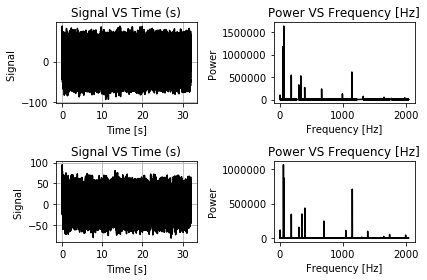

In [3]:
y=a
y = y - np.mean(y) # remove any constant offset
ft = fftpack.fft(y)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2 ,2 ,1)
plt.plot(t,y,'-k')
plt.title('Signal VS Time (s)')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,2 ,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.title('Power VS Frequency [Hz]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.subplot(2, 2, 3)
y1=b
y1 = y1 - np.mean(y1) # remove any constant offset
ft = fftpack.fft(y1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.plot(t,y1,'-k')
plt.title('Signal VS Time (s)')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,2 ,4)
# plot positive frequey = a
y = y - np.mean(y) # remove any constant offset
ft = fftpack.fft(y)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2 ,2 ,1)
plt.plot(t,y,'-k')
plt.title('Signal VS Time (s)')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,2 ,2)
# plot positive freqncies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.title('Power VS Frequency [Hz]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('Meth1_RawPower_SignalPlots')

In [4]:
y = a
y = y - np.mean(y) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
ft = fftpack.fft(y)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
freq_est = freqs[np.argmax(np.abs(ft))]
i = 0
while freq_est > 40 and i < 14:
    
    y = y - np.mean(y) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
    ft = fftpack.fft(y)
    freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0]))

    freq_est = freqs[np.argmax(np.abs(ft))] # frequency of highest peak

    if freq_est < 40:
        continue
    print('freq=', freq_est)
    amp_est = np.max(np.abs(ft))/len(y)*2 # amplitude of the highest peak
# Estimate phase
    matrixA = np.vstack([np.sin(freq_est*2*np.pi*t), np.cos(freq_est*2*np.pi*t), np.ones(len(t))]).T

    alpha = np.dot(matrixA.T,matrixA)
    beta = np.dot(matrixA.T,y)
    matrixC = np.linalg.inv(alpha) # covariance matrix
    afit = np.dot(matrixC,beta) # solution vector
    phase_est = np.arctan2(afit[1],afit[0])
#
# Sine fitting function
#
    def func(t,f,p,a,offset):
        return a*np.sin(t*2*np.pi*f+p)+offset
# Assume offset is zero
    popt, pcov = curve_fit(func,t,y,p0=[freq_est,phase_est,amp_est,0.])
    print(popt[0], popt[2]) # fitted frequency and amplitude
    y = y-func(t,*popt) # subtract fit from data


freq= 59.96890352039301
59.9690385708197 24.975742541943713
freq= 46.75011968030638
46.7600201401481 21.447851970989404
freq= 1144.252929287499
1144.2510888816319 9.363864193379786
freq= 179.90671056117904
179.90710857571597 8.315219314953533
freq= 331.4070984021719
331.4098510422801 8.201775549434
freq= 299.84451760196504
299.8451330665701 4.996090309225162
freq= 393.0322561625758
393.0223947030357 4.684594614160263
freq= 662.8141968043439
662.8196285010722 3.9265403160524333
freq= 994.2212952065157
994.229487467973 2.3974891153004005


In [5]:
y1 = b

y1 = y1 - np.mean(y1) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
ft = fftpack.fft(y1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
freq_est = freqs[np.argmax(np.abs(ft))]
x = freqs[np.argmax(np.abs(ft))]

while freq_est > 40:
    
    y1 = y1 - np.mean(y1) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
    ft = fftpack.fft(y1)
    freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
    freq_est = freqs[np.argmax(np.abs(ft))] # frequency of highest peak

    if freq_est < 40:
        continue
    amp_est = np.max(np.abs(ft))/len(y1)*2 # amplitude of the highest peak
# Estimate phase
    matrixA = np.vstack([np.sin(freq_est*2*np.pi*t), np.cos(freq_est*2*np.pi*t), np.ones(len(t))]).T

    alpha = np.dot(matrixA.T,matrixA)
    beta = np.dot(matrixA.T,y1)
    matrixC = np.linalg.inv(alpha) # covariance matrix
    afit = np.dot(matrixC,beta) # solution vector
    phase_est = np.arctan2(afit[1],afit[0])
#
# Sine fitting function
#
    def func(t,f,p,a,offset):
        return a*np.sin(t*2*np.pi*f+p)+offset
# Assume offset is zero
    popt, pcov = curve_fit(func,t,y1,p0=[freq_est,phase_est,amp_est,0.])
    print(popt[0], popt[2]) # fitted frequency and amplitude
    y1 = y1-func(t,*popt) # subtract fit from data

54.69402005253436 17.47775037590186
60.010018447475126 15.889303764392547
1151.4874772502662 14.336098703149244
396.7811538632923 6.652689415037816
349.1102140699214 7.966579950454625
180.0300487516478 5.289193852480962
698.2204563749577 3.8011206949136778
300.0500067484512 3.180232674710428


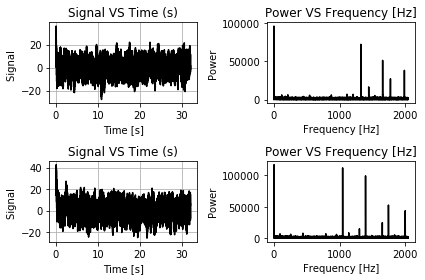

In [6]:
y_1 = y - np.mean(y) # remove any constant offset
ft = fftpack.fft(y_1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2 ,2 ,1)
plt.plot(t,y_1,'-k')
plt.title('Signal VS Time (s)')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,2 ,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.title('Power VS Frequency [Hz]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.subplot(2, 2, 3)
y_2 = y1 - np.mean(y1) # remove any constant offset
ft = fftpack.fft(y_2)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.plot(t,y_2,'-k')
plt.title('Signal VS Time (s)')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,2 ,4)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.title('Power VS Frequency [Hz]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('Meth1_RawPower_SignalPlots_AfterFT')

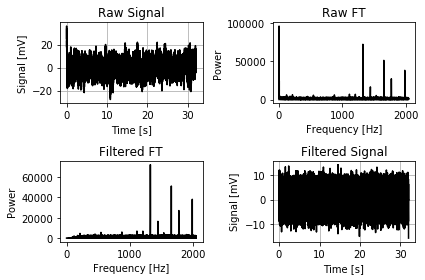

In [7]:

#High pass Filtering
y = y - np.mean(y) # remove any constant offset
plt.subplot(2,2,1)
plt.plot(t,y, c='k')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Signal [mV]")
plt.title("Raw Signal")
ft = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2,2,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]), c='black')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Raw FT")
f_c = 90 # cutoff frequency 30Hz
filt = 1-np.exp(-(0.5*freqs/f_c)**2) # High pass filter
ft_filtered = ft*filt
plt.subplot(2,2,3)
plt.plot(freqs[0:len(freqs)//2],np.abs(ft_filtered[0:len(ft_filtered)//2]), c='black')
plt.plot(freqs[0:len(freqs)//2],filt[0:len(filt)//2]*100,':', c='black') # rescale by 100
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Filtered FT")
y_filtered = np.real(fftpack.ifft(ft_filtered))
plt.subplot(2,2,4)
plt.plot(t,y_filtered, c='black')
plt.grid()
y = y_filtered
plt.xlabel("Time [s]")
plt.ylabel("Signal [mV]")
plt.title("Filtered Signal")
plt.tight_layout()
plt.savefig('Meth1_RawPower_SignalPlots_AfterHigh_A')
plt.show()



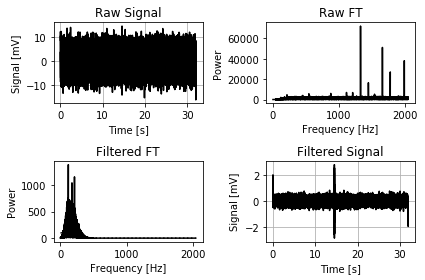

In [8]:
#Low pass filtering
y = y - np.mean(y) # remove any constant offset
plt.subplot(2,2,1)
plt.plot(t,y, c='black')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Signal [mV]")
plt.title("Raw Signal")
ft = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2,2,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]), c='black')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Raw FT")
f_c = 90 # cutoff frequency 30Hz
filt = np.exp(-(0.5*freqs/f_c)**2) # Low-pass filter
ft_filtered = ft*filt
plt.subplot(2,2,3)
plt.plot(freqs[0:len(freqs)//2],np.abs(ft_filtered[0:len(ft_filtered)//2]), c='black')
plt.plot(freqs[0:len(freqs)//2],filt[0:len(filt)//2]*100,':', c='black') # rescale by 100
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Filtered FT")
y_filtered = np.real(fftpack.ifft(ft_filtered))
plt.subplot(2,2,4)
plt.plot(t,y_filtered, c='black')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Signal [mV]")
plt.title("Filtered Signal")
plt.tight_layout()
plt.savefig('Meth1_RawPower_SignalPlots_AfterLow_A')
plt.show()
y = y_filtered

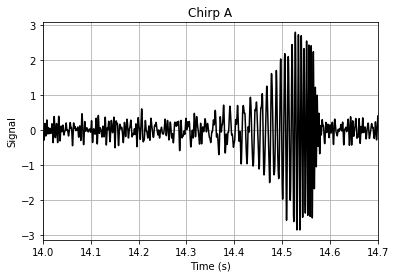

In [9]:
plt.plot(t, y, c='black')
plt.xlim(14, 14.7)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.grid()
plt.title('Chirp A')
plt.savefig('Meth1_chrip_A')

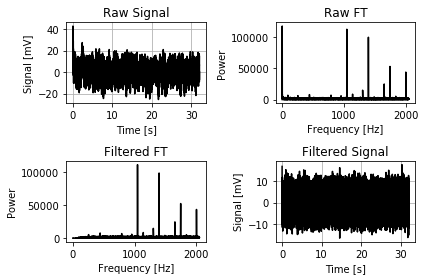

In [10]:
#High pass filtering

y1 = y1 - np.mean(y1) # remove any constant offset
plt.subplot(2,2,1)
plt.plot(t,y1, c='black')
plt.xlabel("Time [s]")
plt.grid()
plt.ylabel("Signal [mV]")
plt.title("Raw Signal")
ft = fftpack.fft(y1)
freqs = fftpack.fftfreq(len(y1), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2,2,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]), c='black')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Raw FT")
f_c = 90 # cutoff frequency 30Hz
filt = 1-np.exp(-(0.5*freqs/f_c)**2) # High-pass filter
ft_filtered = ft*filt
plt.subplot(2,2,3)
plt.plot(freqs[0:len(freqs)//2],np.abs(ft_filtered[0:len(ft_filtered)//2]), c='black')
plt.plot(freqs[0:len(freqs)//2],filt[0:len(filt)//2]*100,':',c='black') # rescale by 100
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Filtered FT")
y_filtered = np.real(fftpack.ifft(ft_filtered))
plt.subplot(2,2,4)
plt.plot(t,y_filtered, c='black')
plt.xlabel("Time [s]")
plt.grid()
plt.ylabel("Signal [mV]")
plt.title("Filtered Signal")
plt.tight_layout()
plt.savefig('Meth1_RawPower_SignalPlots_After_High_B')
plt.show()
y1 = y_filtered


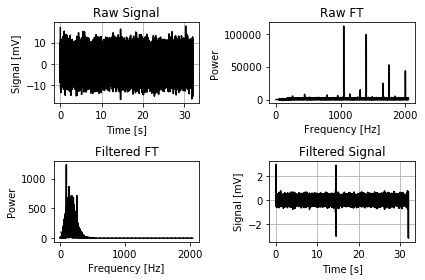

In [11]:
#Low pass filtering
y1 = y1 - np.mean(y1) # remove any constant offset
plt.subplot(2,2,1)
plt.plot(t,y1, c='black')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Signal [mV]")
plt.title("Raw Signal")
ft = fftpack.fft(y1)
freqs = fftpack.fftfreq(len(y1), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2,2,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]), c='black')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Raw FT")
f_c = 90 # cutoff frequency 30Hz
filt = np.exp(-(0.5*freqs/f_c)**2) # Low-pass filter
ft_filtered = ft*filt
plt.subplot(2,2,3)
plt.plot(freqs[0:len(freqs)//2],np.abs(ft_filtered[0:len(ft_filtered)//2]), c='black')
plt.plot(freqs[0:len(freqs)//2],filt[0:len(filt)//2]*100,':', c='black') # rescale by 100
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.title("Filtered FT")
y_filtered = np.real(fftpack.ifft(ft_filtered))
plt.subplot(2,2,4)
plt.plot(t,y_filtered, c='black')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Signal [mV]")
plt.title("Filtered Signal")
plt.tight_layout()
plt.savefig('Meth1_RawPower_SignalPlots_After_Low_B')
plt.show()
y1 = y_filtered

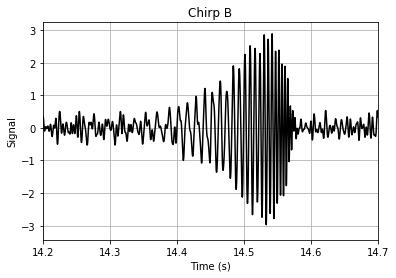

In [12]:
plt.plot(t, y1, c='black')
plt.xlim(14.2, 14.7)
plt.title('Chirp B')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.savefig('Meth1_chirp_b')

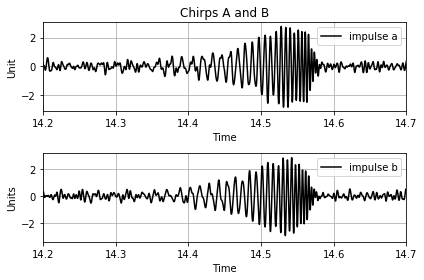

In [13]:
plt.subplot(2,1,1)
#plt.plot(t, a, alpha = 0.7)
plt.plot(t,y,label='impulse a', c='black')
plt.title('Chirps A and B')
plt.grid()
plt.xlim(14.2, 14.7)
plt.xlabel("Time")
plt.ylabel("Unit")
plt.legend(loc=0)
plt.subplot(2,1,2)
#plt.plot(t, b, alpha=0.7)
plt.plot(t,y1,label='impulse b', c='black')
plt.xlim(14.2, 14.7)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Units")
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('Meth1_bothchirps')
plt.show()

In [14]:
y_I = y
y_I1 = y1

16.1159668
[-0.00366211]


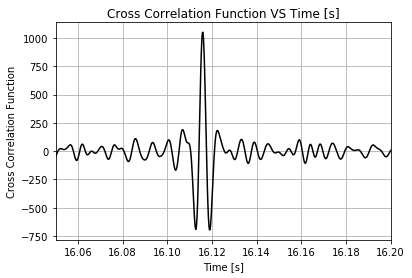

In [15]:
T = t[1000:len(t)-20]
Y = y[1000:len(y)-20]
Y1 = y1[1000:len(y1)-20]

xcorr = signal.correlate(Y1, Y, mode='same')
tmid = T[len(T)//2]
t2maxx = T[np.argmax(xcorr)]
print(t2maxx)
plt.plot(T, xcorr, c='black')
plt.xlabel('Time [s]')
plt.ylabel('Cross Correlation Function')
plt.title('Cross Correlation Function VS Time [s]')
plt.xlim(16.05, 16.2)
plt.grid('Correlation VS Time [2]')
t_max = T[np.where(xcorr == max(xcorr))]
plt.savefig('crosssorr_1')
print(t_max-tmid)


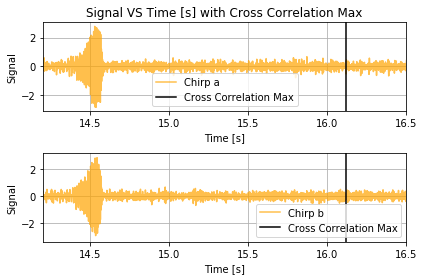

In [16]:
plt.subplot(2, 1, 1)
plt.plot(t, y, label = 'Chirp a', alpha = 0.7, c='orange')
plt.title('Signal VS Time [s] with Cross Correlation Max')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()
plt.axvline(x = t_max, c='black', label='Cross Correlation Max')
plt.legend()
plt.xlim(14.2, 16.5)

plt.subplot(2,1,2)
plt.plot(t, y1, label='Chirp b', alpha=0.7, c='orange')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()
plt.axvline(x = t_max, c='black', label='Cross Correlation Max')
plt.legend()
plt.xlim(14.2, 16.5)
plt.tight_layout()
plt.savefig('Meth1_chirps_w_corr')

## Second Method

In [17]:
y = a
y1 = b

In [18]:
sos = signal.butter(8, 28, 'hp', fs=1000, output='sos')
y = signal.sosfilt(sos, y)

In [19]:
sos = signal.butter(8, 28, 'lp', fs=1000, output='sos')
y = signal.sosfilt(sos, y)

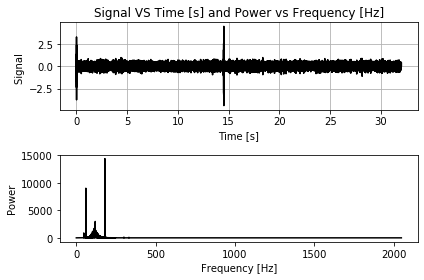

In [20]:
y_1 = y - np.mean(y) # remove any constant offset
ft = fftpack.fft(y_1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2 ,1 ,1)
plt.plot(t,y_1,'-k')
plt.title('Signal VS Time [s] and Power vs Frequency [Hz]')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,1 ,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('Meth2_Power_SignalPlots_First_A')
plt.show()

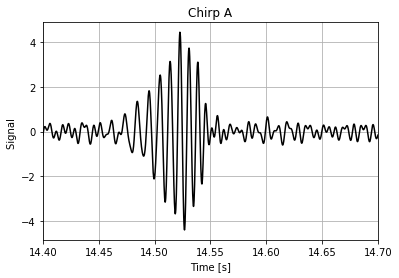

In [21]:
plt.plot(t, y, c='black')
plt.title('Chirp A')
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.grid()
plt.xlim(14.4, 14.7)
plt.savefig('Meth2_Initial_ChirpA')
Y2 = y

In [22]:
sos = signal.butter(8, 30, 'hp', fs=1000, output='sos')
y1 = signal.sosfilt(sos, y1)

In [23]:
sos = signal.butter(8, 30, 'lp', fs=1000, output='sos')
y1 = signal.sosfilt(sos, y1)

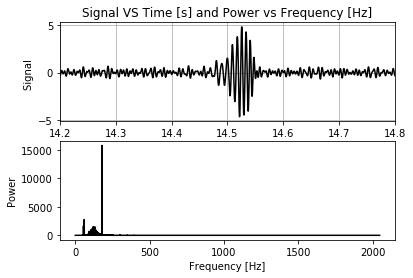

In [24]:
y_1 = y1 - np.mean(y1) # remove any constant offset
ft = fftpack.fft(y_1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2 ,1 ,1)
plt.plot(t,y_1,'-k')
plt.title('Signal VS Time [s] and Power vs Frequency [Hz]')
plt.xlim(14.2, 14.8)
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,1 ,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.savefig('Meth2_Power_SignalPlots_First_B')
plt.show()

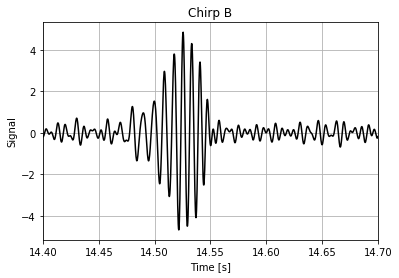

In [25]:
plt.plot(t, y1, c='black')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Chirp B')
plt.xlim(14.4, 14.7)
plt.savefig('Meth2_Initial_ChirpB')
Y2_1 = y1

In [26]:
y = y - np.mean(y) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
ft = fftpack.fft(y)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
freq_est = freqs[np.argmax(np.abs(ft))]
i = 0
for i in range(2):
    
    y = y - np.mean(y) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
    ft = fftpack.fft(y)
    freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0]))

    freq_est = freqs[np.argmax(np.abs(ft))] # frequency of highest peak

    amp_est = np.max(np.abs(ft))/len(y)*2 # amplitude of the highest peak
# Estimate phase
    matrixA = np.vstack([np.sin(freq_est*2*np.pi*t), np.cos(freq_est*2*np.pi*t), np.ones(len(t))]).T

    alpha = np.dot(matrixA.T,matrixA)
    beta = np.dot(matrixA.T,y)
    matrixC = np.linalg.inv(alpha) # covariance matrix
    afit = np.dot(matrixC,beta) # solution vector
    phase_est = np.arctan2(afit[1],afit[0])
#
# Sine fitting function
#
    def func(t,f,p,a,offset):
        return a*np.sin(t*2*np.pi*f+p)+offset
# Assume offset is zero
    popt, pcov = curve_fit(func,t,y,p0=[freq_est,phase_est,amp_est,0.])
    print(popt[0], popt[2]) # fitted frequency and amplitude
    y = y-func(t,*popt) # subtract 

179.90711010751644 0.21979940254222344
59.96906937784125 0.13745364893380027


In [27]:
sos = signal.butter(8, 15, 'hp', fs=1000, output='sos')
y = signal.sosfilt(sos, y)

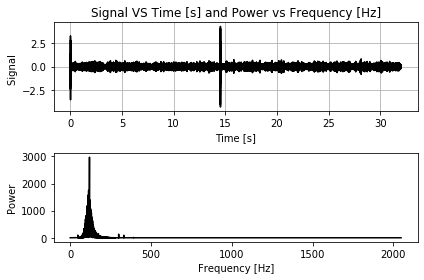

In [28]:
y_1 = y - np.mean(y) # remove any constant offset
ft = fftpack.fft(y_1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2 ,1 ,1)
plt.plot(t,y_1,'-k')
plt.title('Signal VS Time [s] and Power vs Frequency [Hz]')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal ')
plt.subplot(2 ,1 ,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('Meth2PowerFinal_A')
plt.show()

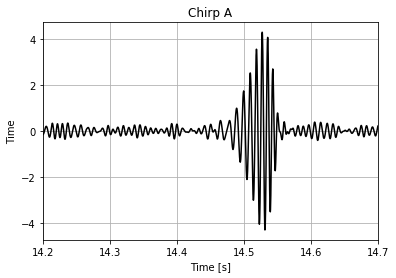

In [29]:
plt.plot(t, y, c='black')
plt.title('Chirp A')
plt.xlabel('Time [s]')
plt.ylabel('Time')
plt.grid()
plt.xlim(14.2, 14.7)
plt.savefig('Meth2_Final_A')

In [30]:
y = y1 - np.mean(y1) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
ft = fftpack.fft(y1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
freq_est = freqs[np.argmax(np.abs(ft))]
i = 0
for i in range(2):
    
    y = y - np.mean(y) # remove any constant offset
# Use FFT to obtain initial frequency and amplitude estimate
    ft = fftpack.fft(y)
    freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0]))

    freq_est = freqs[np.argmax(np.abs(ft))] # frequency of highest peak

    amp_est = np.max(np.abs(ft))/len(y)*2 # amplitude of the highest peak
# Estimate phase
    matrixA = np.vstack([np.sin(freq_est*2*np.pi*t), np.cos(freq_est*2*np.pi*t), np.ones(len(t))]).T

    alpha = np.dot(matrixA.T,matrixA)
    beta = np.dot(matrixA.T,y)
    matrixC = np.linalg.inv(alpha) # covariance matrix
    afit = np.dot(matrixC,beta) # solution vector
    phase_est = np.arctan2(afit[1],afit[0])
#
# Sine fitting function
#
    def func(t,f,p,a,offset):
        return a*np.sin(t*2*np.pi*f+p)+offset
# Assume offset is zero
    popt, pcov = curve_fit(func,t,y,p0=[freq_est,phase_est,amp_est,0.])
    print(popt[0], popt[2]) # fitted frequency and amplitude
    y1 = y-func(t,*popt) # subtract 

180.03004014869597 0.24191012278848645
180.03004017150727 0.2419101116715696


In [31]:
sos = signal.butter(8, 20, 'hp', fs=1000, output='sos')
y1 = signal.sosfilt(sos, y1)

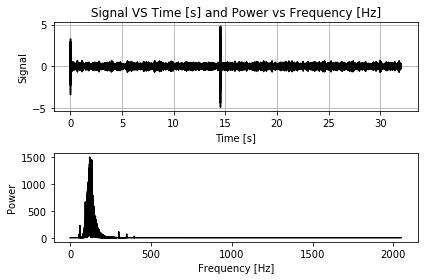

In [32]:
y_1 = y1 - np.mean(y1) # remove any constant offset
ft = fftpack.fft(y_1)
freqs = fftpack.fftfreq(len(t), d=(t[1]-t[0])) # d is sample spacing
plt.subplot(2 ,1 ,1)
plt.plot(t,y_1,'-k')
plt.title('Signal VS Time [s] and Power vs Frequency [Hz]')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.subplot(2 ,1 ,2)
# plot positive frequencies only and modulus of complex ft
plt.plot(freqs[0:len(freqs)//2],np.abs(ft[0:len(ft)//2]),'-k')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('Meth2PowerFinal_B')

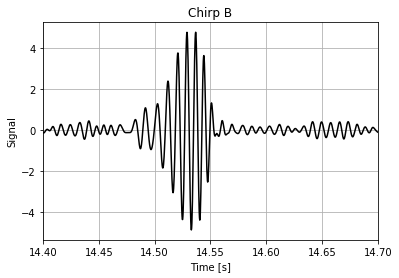

In [33]:
plt.plot(t, y1, c='black')
plt.title('Chirp B')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()
plt.xlim(14.4, 14.7)
plt.savefig('Meth2Final_B')

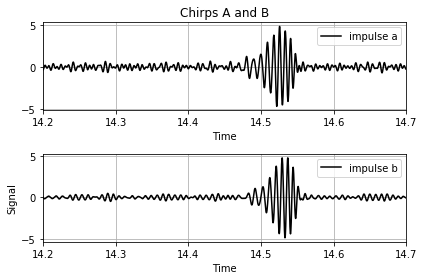

In [34]:
plt.subplot(2,1,1)
#plt.plot(t, a, alpha = 0.7)
plt.plot(t,y,label='impulse a', c='black')
plt.title('Chirps A and B')
plt.grid()
plt.xlim(14.2, 14.7)
plt.xlabel("Time")
plt.ylabel("")
plt.legend(loc=0)
plt.subplot(2,1,2)
#plt.plot(t, b, alpha=0.7)
plt.plot(t,y1,label='impulse b', c='black')
plt.grid()
plt.xlim(14.2, 14.7)
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('Meth2_bothchirps')
plt.show()

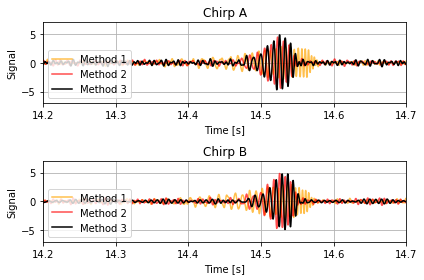

In [35]:
plt.subplot(2, 1,1)
plt.plot(t, y_I, c='orange', alpha=0.7, label='Method 1')
plt.plot(t, Y2, c ='red', alpha = 0.7, label='Method 2')
plt.plot(t, y, c='black', label='Method 3')
plt.title('Chirp A')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()
plt.legend(loc=3)
#plt.plot(t, a, c ='blue', alpha=0.2)
plt.xlim(14.2, 14.7)
plt.ylim(-7, 7)

plt.subplot(2, 1,2)

plt.plot(t, y_I1, c='orange', alpha=0.7, label='Method 1')
plt.plot(t, Y2_1, c ='red', alpha = 0.7, label='Method 2')
plt.plot(t, y1, c='black', label='Method 3')
plt.title('Chirp B')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()
plt.legend(loc=3)
plt.tight_layout()
#plt.plot(t, b, c ='blue', alpha=0.2)
plt.xlim(14.2, 14.7)
plt.ylim(-7, 7)
plt.savefig('Methcomparison')

16.1159668
[-0.00366211]


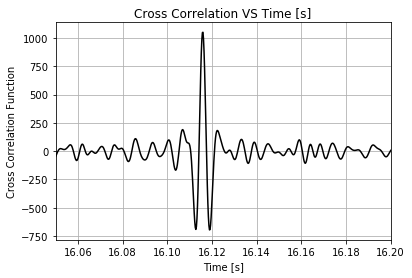

In [36]:
xcorr = signal.correlate(Y1, Y, mode='same')
tmid = T[len(T)//2]
t2maxx = T[np.argmax(xcorr)]
print(t2maxx)
plt.plot(T, xcorr, c='black')
plt.xlabel('Time [s]')
plt.ylabel('Cross Correlation Function')
plt.grid()
t_max = T[np.where(xcorr == max(xcorr))]
plt.title('Cross Correlation VS Time [s]')
plt.xlim(16.05, 16.2)
print(t_max-tmid)
plt.savefig('crosscor_2')

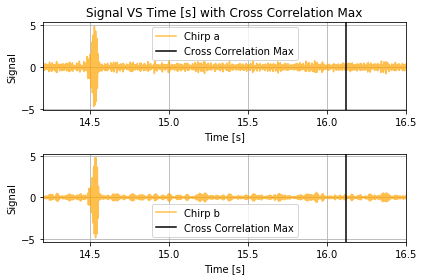

In [37]:
plt.subplot(2, 1, 1)
plt.plot(t, y, label = 'Chirp a', alpha = 0.7, c='orange')
plt.title('Signal VS Time [s] with Cross Correlation Max')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()
plt.axvline(x = t_max, c='black', label='Cross Correlation Max')
plt.legend()
plt.xlim(14.2, 16.5)

plt.subplot(2,1,2)
plt.plot(t, y1, label='Chirp b', alpha=0.7, c='orange')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.grid()
plt.axvline(x = t_max, c='black', label='Cross Correlation Max')
plt.legend()
plt.xlim(14.2, 16.5)
plt.tight_layout()
plt.savefig('Meth2_chirps_w_corr')